# Analyzing Car Accidents in Canada from 1999 - 2014 using a distributed environment in PySpark

In [1]:
import pyspark as py
import pandas as pd
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('analysis').getOrCreate()
df = spark.read.csv('NCDB_1999_to_2014.csv',header=True)
df.show(10,False)

+------+------+------+------+-----+------+------+------+------+------+------+------+----+------+------+----+-----+-----+-----+------+------+------+
|C_YEAR|C_MNTH|C_WDAY|C_HOUR|C_SEV|C_VEHS|C_CONF|C_RCFG|C_WTHR|C_RSUR|C_RALN|C_TRAF|V_ID|V_TYPE|V_YEAR|P_ID|P_SEX|P_AGE|P_PSN|P_ISEV|P_SAFE|P_USER|
+------+------+------+------+-----+------+------+------+------+------+------+------+----+------+------+----+-----+-----+-----+------+------+------+
|1999  |01    |1     |20    |2    |02    |34    |UU    |1     |5     |3     |03    |01  |06    |1990  |01  |M    |41   |11   |1     |UU    |1     |
|1999  |01    |1     |20    |2    |02    |34    |UU    |1     |5     |3     |03    |02  |01    |1987  |01  |M    |19   |11   |1     |UU    |1     |
|1999  |01    |1     |20    |2    |02    |34    |UU    |1     |5     |3     |03    |02  |01    |1987  |02  |F    |20   |13   |2     |02    |2     |
|1999  |01    |1     |08    |2    |01    |01    |UU    |5     |3     |6     |18    |01  |01    |1986  |01  |M   

In [3]:
print("Total Rows in Dataset:",df.select("*").count())

Total Rows in Dataset: 5860405


In [4]:
print("Name of Columns - Printing for reference")
df.schema.names

Name of Columns - Printing for reference


['C_YEAR',
 'C_MNTH',
 'C_WDAY',
 'C_HOUR',
 'C_SEV',
 'C_VEHS',
 'C_CONF',
 'C_RCFG',
 'C_WTHR',
 'C_RSUR',
 'C_RALN',
 'C_TRAF',
 'V_ID',
 'V_TYPE',
 'V_YEAR',
 'P_ID',
 'P_SEX',
 'P_AGE',
 'P_PSN',
 'P_ISEV',
 'P_SAFE',
 'P_USER']

In [5]:
###################
###Cleaning Data###
###################
df = df.select("*").filter(col("C_MNTH").cast("int").isNotNull())
df = df.select("*").filter(col("P_SAFE").cast("int").isNotNull())

# Total No. of Collisions together for a month.

In [6]:
collisions_month_together = df.select(col("C_MNTH").alias("Month")).groupBy("Month").count().sort("Month")
collisions_month_together.show(collisions_month_together.count(),False)

+-----+------+
|Month|count |
+-----+------+
|01   |398238|
|02   |338002|
|03   |332487|
|04   |311390|
|05   |368030|
|06   |405530|
|07   |421094|
|08   |428036|
|09   |399756|
|10   |406319|
|11   |395922|
|12   |421162|
+-----+------+



In [7]:
collisions_month_together_pandas_df = collisions_month_together.select("*").toPandas()

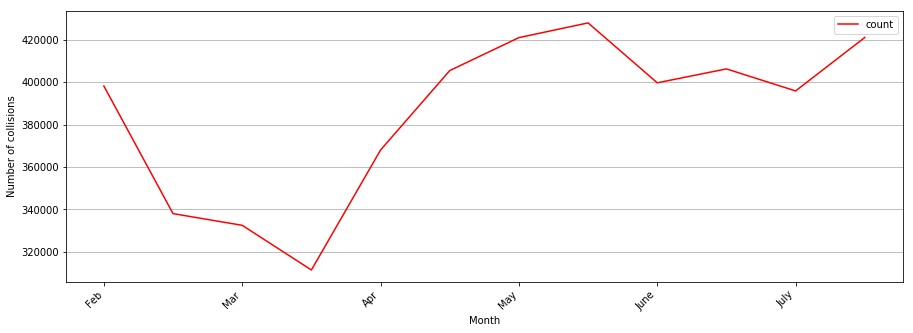

In [118]:
collisions_month_together = collisions_month_together_pandas_df.plot(figsize=(15,5),color='red')
month_arr = ["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
collisions_month_together.set_xticklabels(month_arr,ha='right',rotation = 45)
collisions_month_together.set_xlabel("Month")
collisions_month_together.set_ylabel("Number of collisions");
collisions_month_together.grid(axis = 'y')

# Collisions grouped by the Day of Week

In [9]:
collisions_week_together = df.select(col("C_WDAY").alias("Day")).filter(col("Day") != "U").groupBy("Day").count().sort("Day")
collisions_week_together.show(collisions_week_together.count(),False)

+---+------+
|Day|count |
+---+------+
|1  |613643|
|2  |642114|
|3  |647141|
|4  |680895|
|5  |787551|
|6  |691273|
|7  |562821|
+---+------+



In [10]:
collisions_week_together_pandas_df = collisions_week_together.select("*").toPandas()

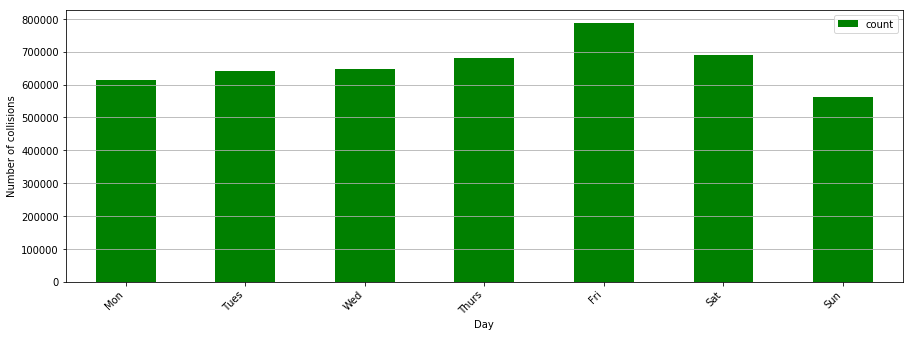

In [119]:
collisions_week_together = collisions_week_together_pandas_df.plot.bar(figsize=(15,5),color='green')
day_arr = ["Mon","Tues","Wed","Thurs","Fri","Sat","Sun"]
collisions_week_together.set_xticklabels(day_arr,ha='right',rotation = 45)
collisions_week_together.set_xlabel("Day")
collisions_week_together.set_ylabel("Number of collisions");
collisions_week_together.grid(axis='y')

# Collisions grouped by the Hour of Day

In [12]:
collisions_hour_together = df.select(col("C_HOUR").alias("Hour")).filter(col("Hour") != "UU").groupBy("Hour").count().sort("Hour")
collisions_hour_together.show(5,False)

+----+-----+
|Hour|count|
+----+-----+
|00  |67928|
|01  |55577|
|02  |57060|
|03  |47580|
|04  |30337|
+----+-----+
only showing top 5 rows



In [13]:
collisions_hour_together_pandas_df = collisions_hour_together.select("*").toPandas()

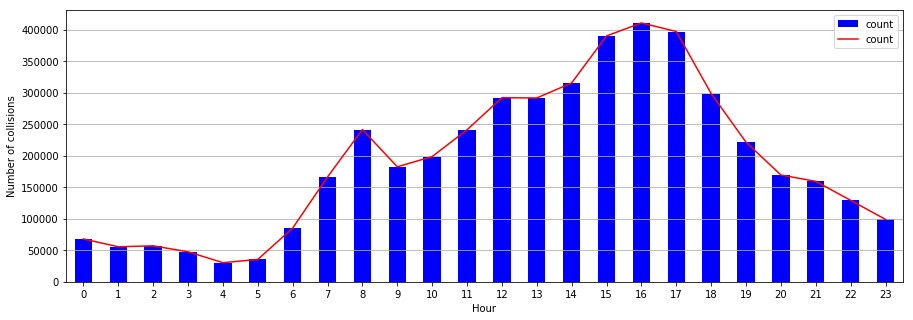

In [120]:
collisions_hour_together = collisions_hour_together_pandas_df.plot.bar(figsize=(15,5), label = "Bar" ,color='blue')
collisions_hour_together_pandas_df.plot(ax = collisions_hour_together, figsize=(15,5), label = "Line",color='red')

collisions_hour_together.set_xlabel("Hour")
collisions_hour_together.set_ylabel("Number of collisions");
collisions_hour_together.grid(axis = 'y')

# Total No. of collisions in a month for each month seperately

In [15]:
collisions_month = df.select(concat(col("C_YEAR"), lit("-"), col("C_MNTH")).alias("Date")).groupBy("Date").count().sort("Date")
collisions_month.show(5,False)

+-------+-----+
|Date   |count|
+-------+-----+
|1999-01|26313|
|1999-02|21112|
|1999-03|23226|
|1999-04|22522|
|1999-05|28070|
+-------+-----+
only showing top 5 rows



In [16]:
collisions_month_pandas_df = collisions_month.select("*").toPandas()

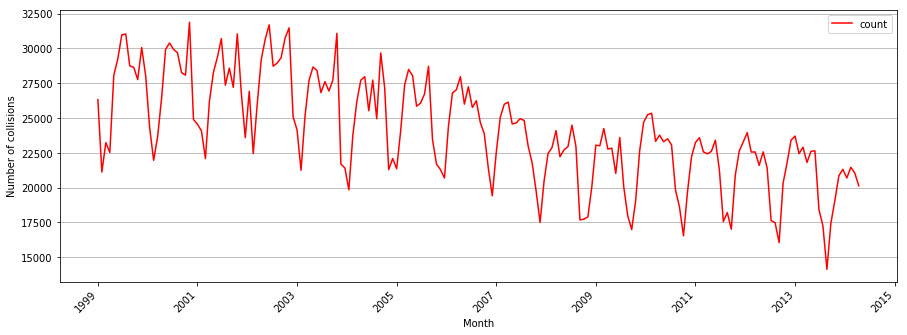

In [121]:
plot_collisions_month = collisions_month_pandas_df.plot(figsize=(15,5),x="Date",y="count",color='red')
date_arr = [1997,1999,2001,2003,2005,2007,2009,2011,2013,2015]
plot_collisions_month.set_xticklabels(date_arr,ha='right',rotation = 45)
plot_collisions_month.set_xlabel("Month")
plot_collisions_month.set_ylabel("Number of collisions");
plot_collisions_month.grid(axis='y')

# No. of collisions grouped by severity in a month

In [18]:
severity = df.select(concat(col("C_YEAR"), lit("-"), col("C_MNTH")).alias("Date"), "C_SEV")
severity = severity.groupBy("Date","C_SEV").count().sort("Date")

severity_high = severity.filter(col("C_SEV") == 1)
severity_high.show(5,False)

severity_low = severity.filter(col("C_SEV") == 2)
severity_low.show(5,False)

+-------+-----+-----+
|Date   |C_SEV|count|
+-------+-----+-----+
|1999-01|1    |337  |
|1999-02|1    |390  |
|1999-03|1    |492  |
|1999-04|1    |347  |
|1999-05|1    |525  |
+-------+-----+-----+
only showing top 5 rows

+-------+-----+-----+
|Date   |C_SEV|count|
+-------+-----+-----+
|1999-01|2    |25976|
|1999-02|2    |20722|
|1999-03|2    |22734|
|1999-04|2    |22175|
|1999-05|2    |27545|
+-------+-----+-----+
only showing top 5 rows



In [19]:
severity_high_pandas_df = severity_high.select("*").toPandas()
severity_low_pandas_df = severity_low.select("*").toPandas()

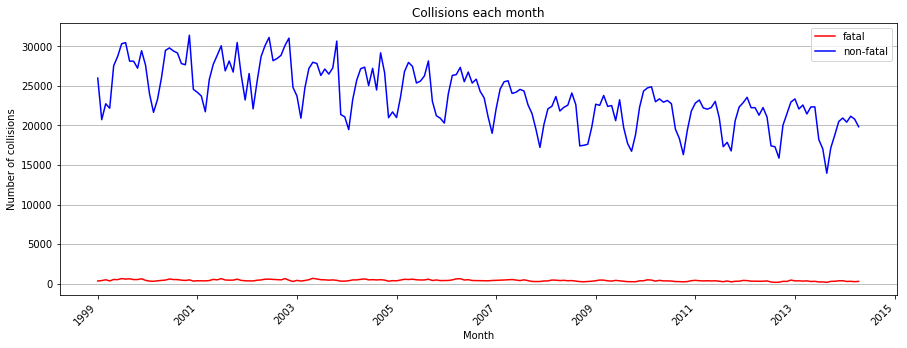

In [122]:
plot_severity_high = severity_high_pandas_df.plot(figsize=(15,5),label = "fatal", x="Date",y="count",color='red')
plot_severity_low = severity_low_pandas_df.plot(ax = plot_severity_high, label = "non-fatal", figsize=(15,5),x="Date",y="count",title='Collisions each month',color='blue')
date_arr = [1997,1999,2001,2003,2005,2007,2009,2011,2013,2015]
plot_severity_high.set_xticklabels(date_arr,ha='right',rotation = 45)
plot_severity_high.set_xlabel("Month")
plot_severity_high.set_ylabel("Number of collisions");
plot_severity_high.grid(axis='y')

# No. of Collisions depending upon weather conditions

In [21]:
collisions_weather = df.select(col("C_WTHR").alias("Weather_Condition")).groupBy("Weather_Condition").count()
collisions_weather.sort("count").show(collisions_month.count(),False)

+-----------------+-------+
|Weather_Condition|count  |
+-----------------+-------+
|Q                |12565  |
|7                |12605  |
|5                |25013  |
|U                |58336  |
|6                |66065  |
|4                |294998 |
|2                |445129 |
|3                |483079 |
|1                |3228176|
+-----------------+-------+



1 Clear and sunny
2 Overcast, cloudy but no precipitation
3 Raining
4 Snowing, not including drifting snow
5 Freezing rain, sleet, hail
6 Visibility limitation e.g. drifting snow, fog, smog, dust, smoke, mist
7 Strong wind
Q Choice is other than the preceding values
U Unknown
X Jurisdiction does not provide this data element

# Severity of collisions based on weather

In [22]:
sev_collisions_weather = df.select(col("C_WTHR").alias("Weather_Condition"),col("C_SEV")).groupBy("Weather_Condition","C_SEV").count()
sev_collisions_weather = sev_collisions_weather.filter((col("Weather_Condition") != 'Q') & (col("Weather_Condition") != 'U')).sort("Weather_Condition")

sev_high_collisions_weather = sev_collisions_weather.filter(col("C_SEV") == 1)
sev_low_collisions_weather = sev_collisions_weather.filter(col("C_SEV") == 2)

sev_high_collisions_weather.show(sev_high_collisions_weather.count(),False)
sev_low_collisions_weather.show(sev_low_collisions_weather.count(),False)

+-----------------+-----+-----+
|Weather_Condition|C_SEV|count|
+-----------------+-----+-----+
|1                |1    |50725|
|2                |1    |9577 |
|3                |1    |6352 |
|4                |1    |5756 |
|5                |1    |686  |
|6                |1    |2704 |
|7                |1    |448  |
+-----------------+-----+-----+

+-----------------+-----+-------+
|Weather_Condition|C_SEV|count  |
+-----------------+-----+-------+
|1                |2    |3177451|
|2                |2    |435552 |
|3                |2    |476727 |
|4                |2    |289242 |
|5                |2    |24327  |
|6                |2    |63361  |
|7                |2    |12157  |
+-----------------+-----+-------+



In [23]:
sev_high_collisions_weather_pandas_df = sev_high_collisions_weather.select("*").toPandas()
sev_low_collisions_weather_pandas_df = sev_low_collisions_weather.select("*").toPandas()

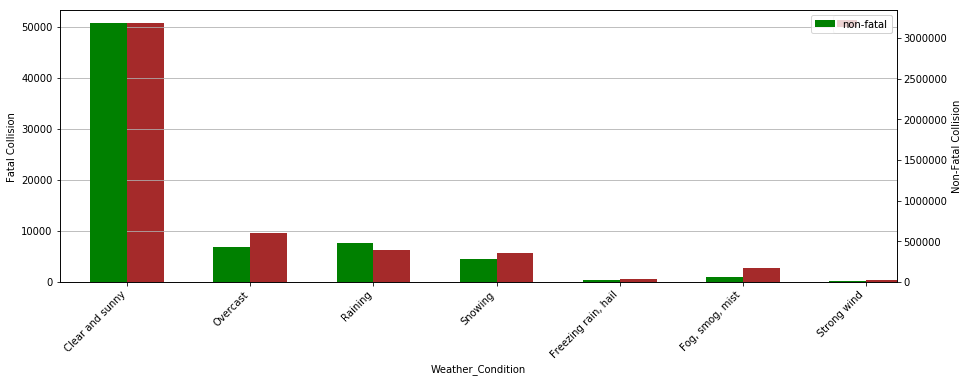

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

weather_type = ['Clear and sunny','Overcast','Raining','Snowing','Freezing rain, hail','Fog, smog, mist',
            'Strong wind']


plot_severity_high_weather = sev_high_collisions_weather_pandas_df.plot.bar(position = 0, ax = ax, figsize=(15,5) , label = "fatal", x="Weather_Condition",y="count",width = width,color='brown')
plot_severity_low_weather = sev_low_collisions_weather_pandas_df.plot.bar(position = 1, ax = ax2, label = "non-fatal", figsize=(15,5),x="Weather_Condition",y="count", width = width,color='green')

ax.set_xticklabels(weather_type,ha='right',rotation = 45)
ax.set_ylabel('Fatal Collision')
ax2.set_ylabel('Non-Fatal Collision')
ax.grid(axis = 'y')

# Collision Severity by Road Configration

In [25]:
sev_collisions_rcfg = df.select(col("C_RCFG").alias("Road_Configration"),col("C_SEV")).groupBy("Road_Configration","C_SEV").count()
sev_collisions_rcfg = sev_collisions_rcfg.sort("Road_Configration")

sev_high_collisions_rcfg = sev_collisions_rcfg.filter(col("C_SEV") == 1)
sev_low_collisions_rcfg = sev_collisions_rcfg.filter(col("C_SEV") == 2)

sev_high_collisions_rcfg.show(sev_high_collisions_rcfg.count(),False)
sev_low_collisions_rcfg.show(sev_low_collisions_rcfg.count(),False)

+-----------------+-----+-----+
|Road_Configration|C_SEV|count|
+-----------------+-----+-----+
|01               |1    |46087|
|02               |1    |20508|
|03               |1    |2101 |
|04               |1    |624  |
|05               |1    |865  |
|06               |1    |174  |
|07               |1    |73   |
|08               |1    |48   |
|09               |1    |9    |
|10               |1    |9    |
|QQ               |1    |2135 |
|UU               |1    |4358 |
+-----------------+-----+-----+

+-----------------+-----+-------+
|Road_Configration|C_SEV|count  |
+-----------------+-----+-------+
|01               |2    |1617887|
|02               |2    |2128086|
|03               |2    |235271 |
|04               |2    |14570  |
|05               |2    |39110  |
|06               |2    |4437   |
|07               |2    |560    |
|08               |2    |9297   |
|09               |2    |1266   |
|10               |2    |345    |
|QQ               |2    |92047  |
|UU        

01 Non-intersection e.g. 'mid-block'
02 At an intersection of at least two public roadways
03 Intersection with parking lot entrance/exit, private driveway or laneway
04 Railroad level crossing
05 Bridge, overpass, viaduct
06 Tunnel or underpass
07 Passing or climbing lane
08 Ramp
09 Traffic circle
10 Express lane of a freeway system
11 Collector lane of a freeway system
12 Transfer lane of a freeway system
QQ Choice is other than the preceding values
UU Unknown
XX Jurisdiction does not provide this data element

In [26]:
sev_high_collisions_rcfg_pandas_df = sev_high_collisions_rcfg.select("*").toPandas()
sev_low_collisions_rcfg_pandas_df = sev_low_collisions_rcfg.select("*").toPandas()

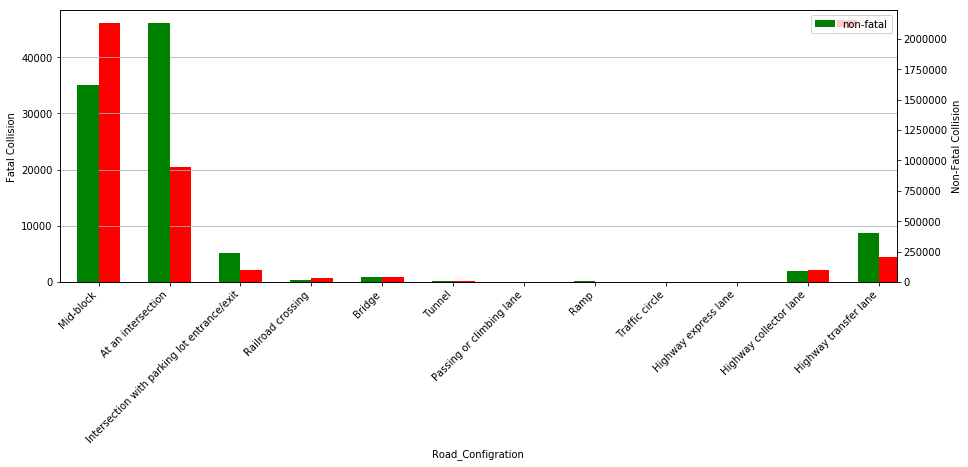

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

rcfg_type = ['Mid-block','At an intersection','Intersection with parking lot entrance/exit',
            'Railroad crossing','Bridge','Tunnel','Passing or climbing lane',
             'Ramp','Traffic circle','Highway express lane',
             'Highway collector lane','Highway transfer lane']

plot_severity_high_rcfg = sev_high_collisions_rcfg_pandas_df.plot.bar(position = 0, ax = ax, figsize=(15,5) , label = "fatal", x="Road_Configration",y="count",width = width,color='red')
plot_severity_low_rcfg = sev_low_collisions_rcfg_pandas_df.plot.bar(position = 1, ax = ax2, label = "non-fatal", figsize=(15,5),x="Road_Configration",y="count", width = width,color='green')
ax.set_xticklabels(rcfg_type,ha='right',rotation=45)
ax.set_ylabel('Fatal Collision')
ax2.set_ylabel('Non-Fatal Collision')
ax.grid(axis='y')

# No. of Collisions per year by Gender

In [28]:
collisions_sex_year = df.select(col("P_SEX").alias("Sex"), col("C_YEAR").alias("Year")).filter((col("Sex") == "M") | (col("Sex") == "F")).groupBy("Sex","Year").count().sort("Year")

collisions_sex_year_male = collisions_sex_year.filter(col("Sex") == "M")
collisions_sex_year_female = collisions_sex_year.filter(col("Sex") == "F")

collisions_sex_year_male.show(5,False)
collisions_sex_year_female.show(5,False)

+---+----+------+
|Sex|Year|count |
+---+----+------+
|M  |1999|178401|
|M  |2000|180736|
|M  |2001|175933|
|M  |2002|180580|
|M  |2003|172943|
+---+----+------+
only showing top 5 rows

+---+----+------+
|Sex|Year|count |
+---+----+------+
|F  |1999|142837|
|F  |2000|149262|
|F  |2001|146092|
|F  |2002|151129|
|F  |2003|145406|
+---+----+------+
only showing top 5 rows



In [29]:
collisions_sex_year_male_pandas_df = collisions_sex_year_male.select("*").toPandas()
collisions_sex_year_female_pandas_df = collisions_sex_year_female.select("*").toPandas()

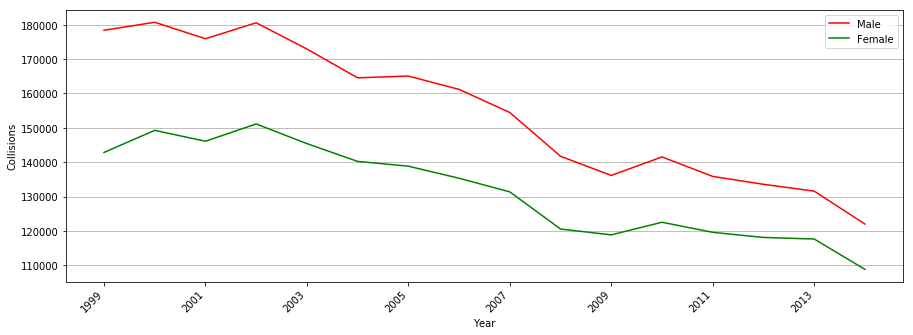

In [126]:
year_arr = [1997,1999,2001,2003,2005,2007,2009,2011,2013,2015]

plot_collisions_sex_year_male = collisions_sex_year_male_pandas_df.plot(figsize=(15,5) , label = "Male", x="Year",y="count",color='red')
plot_collisions_sex_year_female = collisions_sex_year_female_pandas_df.plot(ax = plot_collisions_sex_year_male, label = "Female", figsize=(15,5),x="Year",y="count",color='green')
plot_collisions_sex_year_male.set_xticklabels(year_arr,ha='right',rotation=45)
plot_collisions_sex_year_male.set_ylabel('Collisions')
plot_collisions_sex_year_male.grid(axis='y')

# Modeling Severity of Accidents using pyspark.ml

In [31]:
################################
###Cleaning Data for modeling###
################################
df = df.select("*").filter(col("C_HOUR").cast("int").isNotNull()).withColumn("C_HOUR", df["C_HOUR"].cast(IntegerType()))
df = df.select("*").filter(col("C_VEHS").cast("int").isNotNull()).withColumn("C_VEHS", df["C_VEHS"].cast(IntegerType()))
df = df.select("*").filter(col("C_RCFG").cast("int").isNotNull()).withColumn("C_RCFG", df["C_RCFG"].cast(IntegerType()))
df = df.select("*").filter(col("C_WTHR").cast("int").isNotNull()).withColumn("C_WTHR", df["C_WTHR"].cast(IntegerType()))
df = df.select("*").filter(col("C_RSUR").cast("int").isNotNull()).withColumn("C_RSUR", df["C_RSUR"].cast(IntegerType()))
df = df.select("*").filter(col("C_RALN").cast("int").isNotNull()).withColumn("C_RALN", df["C_RALN"].cast(IntegerType()))
df = df.select("*").filter(col("C_TRAF").cast("int").isNotNull()).withColumn("C_TRAF", df["C_TRAF"].cast(IntegerType()))
df = df.select("*").filter(col("C_SEV").cast("int").isNotNull()).withColumn("C_SEV", df["C_SEV"].cast(IntegerType()))

In [32]:
#Converting features to a Dense Vector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import CountVectorizer

assembler = VectorAssembler(
    inputCols=["C_HOUR", "C_VEHS", "C_RCFG", "C_WTHR", "C_RSUR", "C_RALN", "C_TRAF"],
    outputCol="features")

transformed = assembler.transform(df).select(col("C_SEV").alias("label"), col("features"))

transformed.select("*").show(10,False)

+-----+------------------------------+
|label|features                      |
+-----+------------------------------+
|2    |[15.0,1.0,1.0,1.0,1.0,1.0,6.0]|
|2    |[9.0,2.0,2.0,1.0,1.0,1.0,1.0] |
|2    |[9.0,2.0,2.0,1.0,1.0,1.0,1.0] |
|2    |[9.0,2.0,2.0,1.0,1.0,1.0,1.0] |
|2    |[20.0,1.0,3.0,1.0,1.0,3.0,5.0]|
|2    |[5.0,2.0,2.0,3.0,2.0,4.0,18.0]|
|2    |[5.0,2.0,2.0,3.0,2.0,4.0,18.0]|
|2    |[5.0,2.0,2.0,3.0,2.0,4.0,18.0]|
|2    |[8.0,3.0,2.0,4.0,2.0,4.0,18.0]|
|2    |[8.0,3.0,2.0,4.0,2.0,4.0,18.0]|
+-----+------------------------------+
only showing top 10 rows



In [33]:
###################
# test train split#
################### 
unbaised_df = transformed.sort("label").limit(180000)
train_data, test_data = unbaised_df.randomSplit([0.8,0.2],seed=1234)

train_size = train_data.count()
test_size = test_data.count()

print("Size of train dataset:",train_size)
print("Size of test dataset:",test_size)

Size of train dataset: 144047
Size of test dataset: 35953


In [34]:
####################
# Fitting the model#
####################
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier( labelCol="label", numTrees=100, maxDepth=5, seed=42)

model_rf = rf.fit(train_data)

In [35]:
##############
# Predicting #
##############
predicted_rf = model_rf.transform(test_data)

In [36]:
correct = predicted_rf.select("prediction","label").filter(col("prediction") ==  col("label")).count()

In [37]:
accuracy = (correct/test_size)*100 
print(accuracy)

70.7228882151698


# Relation between Severity of Collision and Safety Devices used 

In [38]:
sev_collisions_sd = df.select(col("P_SAFE").alias("Safety_Device"),col("C_SEV")).groupBy(col("Safety_Device"),"C_SEV").count()
sev_collisions_sd = sev_collisions_sd.sort("Safety_Device")

sev_high_collisions_sd = sev_collisions_sd.filter(col("C_SEV") == 1)
sev_low_collisions_sd = sev_collisions_sd.filter(col("C_SEV") == 2)

sev_high_collisions_sd.show(5,False)
sev_low_collisions_sd.show(5,False)

+-------------+-----+-----+
|Safety_Device|C_SEV|count|
+-------------+-----+-----+
|01           |1    |12333|
|02           |1    |45020|
|09           |1    |2386 |
|12           |1    |557  |
|13           |1    |3658 |
+-------------+-----+-----+

+-------------+-----+-------+
|Safety_Device|C_SEV|count  |
+-------------+-----+-------+
|01           |2    |125120 |
|02           |2    |3394988|
|09           |2    |76544  |
|10           |2    |62     |
|11           |2    |9      |
+-------------+-----+-------+
only showing top 5 rows



In [39]:
sev_high_collisions_sd_pandas_df = sev_high_collisions_sd.select("*").toPandas()
sev_low_collisions_sd_pandas_df = sev_low_collisions_sd.select("*").toPandas()

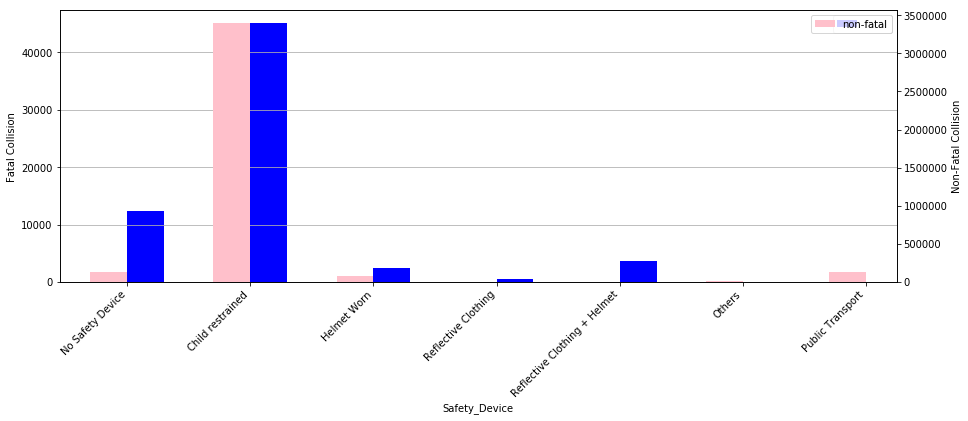

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

rcfg_type = ["No Safety Device", "Child restrained", "Helmet Worn", "Reflective Clothing", "Reflective Clothing + Helmet", "Others", "Public Transport"]

plot_severity_high_sd = sev_high_collisions_sd_pandas_df.plot.bar(position = 0, ax = ax, figsize=(15,5) , label = "fatal", x="Safety_Device",y="count",width = width,color='blue')
plot_severity_low_sd = sev_low_collisions_sd_pandas_df.plot.bar(position = 1, ax = ax2, label = "non-fatal", figsize=(15,5),x="Safety_Device",y="count", width = width,color='pink')
ax.set_xticklabels(rcfg_type,ha='right',rotation=45)
ax.set_ylabel('Fatal Collision')
ax2.set_ylabel('Non-Fatal Collision')
ax.grid(axis='y')

# Road Alignment and No.of Vehicles Involved

In [82]:
seed = 6

def chunk(count):
    return ((count/seed))

In [99]:
collisions_rd_cv = df.select(chunk(col("C_VEHS")).alias("Count_Group"),col("C_RALN"))
collisions_rd_cv = collisions_rd_cv.withColumn("Count_Group", collisions_rd_cv["Count_Group"].cast(IntegerType()))
collisions_rd_cv = collisions_rd_cv.groupBy(col("Count_Group"),"C_RALN").count().sort("Count_Group")
collisions_rd_cv.show(10,False)

collisions_rd_cv_1 = collisions_rd_cv.filter(col("C_RALN") == 1)
collisions_rd_cv_2 = collisions_rd_cv.filter((col("C_RALN") == 2))
collisions_rd_cv_3 = collisions_rd_cv.filter((col("C_RALN") == 3))
collisions_rd_cv_4 = collisions_rd_cv.filter((col("C_RALN") == 4))
collisions_rd_cv_5 = collisions_rd_cv.filter((col("C_RALN") == 5))
collisions_rd_cv_6 = collisions_rd_cv.filter((col("C_RALN") == 6))

+-----------+------+-------+
|Count_Group|C_RALN|count  |
+-----------+------+-------+
|0          |2     |417029 |
|0          |6     |15265  |
|0          |1     |2940667|
|0          |3     |244527 |
|0          |5     |21636  |
|0          |4     |153786 |
|1          |6     |60     |
|1          |2     |3246   |
|1          |3     |578    |
|1          |1     |11141  |
+-----------+------+-------+
only showing top 10 rows



In [100]:
collisions_rd_cv_1_pd = collisions_rd_cv_1.toPandas()
collisions_rd_cv_2_pd = collisions_rd_cv_2.toPandas()
collisions_rd_cv_3_pd = collisions_rd_cv_3.toPandas()
collisions_rd_cv_4_pd = collisions_rd_cv_4.toPandas()
collisions_rd_cv_5_pd = collisions_rd_cv_5.toPandas()
collisions_rd_cv_6_pd = collisions_rd_cv_6.toPandas()

In [101]:
collisions_rd_cv_1_pd.head(5)

,Count_Group,C_RALN,count
0,0,1,2940667
1,1,1,11141
2,2,1,758
3,3,1,350
4,4,1,229


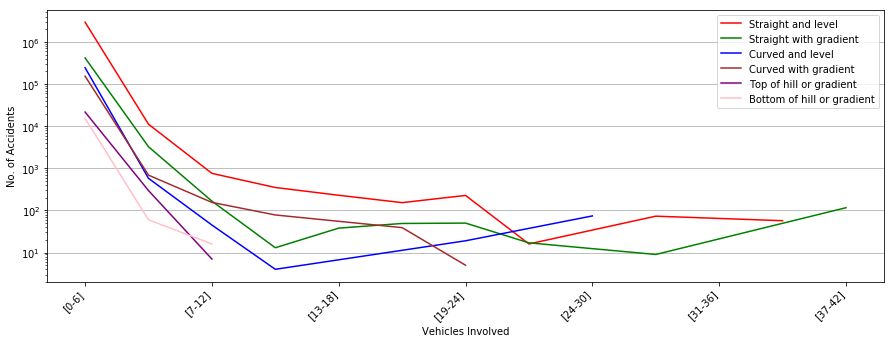

In [129]:
year_arr = ["Start","[0-6]","[7-12]","[13-18]","[19-24]","[24-30]","[31-36]","[37-42]"]

plot_collisions_rd_cv_1_pd = collisions_rd_cv_1_pd.plot(logy=True, figsize=(15,5) , label = "Straight and level", x="Count_Group",y="count",color='red')
plot_collisions_rd_cv_2_pd = collisions_rd_cv_2_pd.plot(ax = plot_collisions_rd_cv_1_pd, label = "Straight with gradient", figsize=(15,5),x="Count_Group",y="count",color='green')
plot_collisions_rd_cv_3_pd = collisions_rd_cv_3_pd.plot(ax = plot_collisions_rd_cv_1_pd, label = "Curved and level", figsize=(15,5),x="Count_Group",y="count",color='blue')
plot_collisions_rd_cv_4_pd = collisions_rd_cv_4_pd.plot(ax = plot_collisions_rd_cv_1_pd, label = "Curved with gradient", figsize=(15,5),x="Count_Group",y="count",color='brown')
plot_collisions_rd_cv_5_pd = collisions_rd_cv_5_pd.plot(ax = plot_collisions_rd_cv_1_pd, label = "Top of hill or gradient", figsize=(15,5),x="Count_Group",y="count",color='purple')
plot_collisions_rd_cv_6_pd = collisions_rd_cv_6_pd.plot(ax = plot_collisions_rd_cv_1_pd, label = "Bottom of hill or gradient", figsize=(15,5),x="Count_Group",y="count",color='pink')

plot_collisions_rd_cv_1_pd.set_xticklabels(year_arr,ha='right',rotation=45)
plot_collisions_rd_cv_1_pd.set_xlabel('Vehicles Involved')
plot_collisions_rd_cv_1_pd.set_ylabel('No. of Accidents')
plot_collisions_rd_cv_1_pd.grid(axis='y')